In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
title_font = {'family': 'serif', 'color': 'darkred', 'weight': 'bold', 'size': 18}
label_font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('log2.csv')
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB
None


In [2]:
print(df.head()) 

   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
4  allow  25358        6778           18580       31                  16   

   pkts_sent  pkts_received  
0          1              1  
1         10              9  
2 

In [3]:
df.dropna(inplace=True)

df.drop_duplicates(inplace=True)
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57170 entries, 0 to 65530
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           57170 non-null  int64 
 1   Destination Port      57170 non-null  int64 
 2   NAT Source Port       57170 non-null  int64 
 3   NAT Destination Port  57170 non-null  int64 
 4   Action                57170 non-null  object
 5   Bytes                 57170 non-null  int64 
 6   Bytes Sent            57170 non-null  int64 
 7   Bytes Received        57170 non-null  int64 
 8   Packets               57170 non-null  int64 
 9   Elapsed Time (sec)    57170 non-null  int64 
 10  pkts_sent             57170 non-null  int64 
 11  pkts_received         57170 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 5.7+ MB
None


In [4]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,57170.000000,57170.000000,57170.000000,57170.000000,5.717000e+04,5.717000e+04,5.717000e+04,5.717000e+04,57170.000000,57170.000000,57170.000000
mean,50532.499738,8052.147035,22048.739549,3054.123491,1.113147e+05,2.564701e+04,8.566766e+04,1.177065e+02,75.116547,47.279255,70.427200
std,13880.680957,16513.145167,22141.986286,10363.545911,6.015189e+06,4.098545e+06,2.637029e+06,5.495436e+03,322.519323,3446.210063,2380.254144
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49450.000000,53.000000,0.000000,0.000000,7.000000e+01,7.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,54013.000000,443.000000,16362.500000,53.000000,1.930000e+02,9.400000e+01,9.000000e+01,2.000000e+00,26.000000,1.000000,1.000000
75%,58574.000000,445.000000,41883.750000,443.000000,1.139000e+03,5.080000e+02,6.690000e+02,1.000000e+01,31.000000,5.000000,4.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [5]:
df.isnull().any().any()

False

In [6]:
y = df['Action'].values
y = y.reshape(-1,1)
x_data = df.drop(['Action'],axis = 1)
print(x_data)

       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0            57222                53            54587                    53   
1            56258              3389            56258                  3389   
2             6881             50321            43265                 50321   
3            50553              3389            50553                  3389   
4            50002               443            45848                   443   
...            ...               ...              ...                   ...   
65526        51710             43069            65147                 43069   
65527        63691                80            13237                    80   
65528        50964                80            13485                    80   
65529        54871               445                0                     0   
65530        54870               445                0                     0   

         Bytes  Bytes Sent  Bytes Received  Packets

In [8]:
#NORMALIZATION

from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalize the data
x_normalized = min_max_scaler.fit_transform(x_data)

# Convert the normalized data back to a DataFrame
x = pd.DataFrame(x_normalized, columns=x_data.columns)

# Check the statistics of the normalized data
pd.Series(x.values.flatten()).describe()


count    628870.000000
mean          0.116792
std           0.273638
min           0.000000
25%           0.000000
50%           0.000003
75%           0.006760
max           1.000000
dtype: float64

In [9]:
x.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.873165,0.000809,0.832944,0.000809,9.217251e-08,3.584694e-08,2.586622e-07,9.651438e-07,0.002772,0.000000,0.000003
1,0.858455,0.051713,0.858442,0.051713,3.708959e-06,1.623655e-06,9.872794e-06,1.737259e-05,0.001571,0.000012,0.000028
2,0.104999,0.767849,0.660182,0.767849,1.402283e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.110772,0.000000,0.000003
3,0.771401,0.051713,0.771389,0.051713,2.573740e-06,1.452855e-06,5.886903e-06,1.351201e-05,0.001571,0.000009,0.000021
4,0.762993,0.006760,0.699596,0.006760,1.992974e-05,7.082933e-06,5.790294e-05,2.895431e-05,0.001478,0.000016,0.000055


In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
encoder = OneHotEncoder()

encoded_Y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

encoded_Y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, encoded_Y, test_size=0.2, random_state=42)

In [12]:

re_transformed_array_trainY = encoder.inverse_transform(y_train)

unique_elements, counts_elements = np.unique(re_transformed_array_trainY, return_counts=True)
unique_elements_and_counts_trainY = pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)
unique_elements_and_counts_trainY.columns = ['unique_elements', 'count']

unique_elements_and_counts_trainY

,unique_elements,count
0,allow,30009
1,deny,6427
2,drop,9254
3,reset-both,46


In [13]:
re_transformed_array_testY = encoder.inverse_transform(y_test)

unique_elements, counts_elements = np.unique(re_transformed_array_testY, return_counts=True)
unique_elements_and_counts_testY = pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)
unique_elements_and_counts_testY.columns = ['unique_elements', 'count']

unique_elements_and_counts_testY


,unique_elements,count
0,allow,7430
1,deny,1615
2,drop,2381
3,reset-both,8


In [14]:
list_trainY = unique_elements_and_counts_trainY['unique_elements'].to_list()

list_testY = unique_elements_and_counts_testY['unique_elements'].to_list()

print(list_trainY)

print(list_testY)

['allow', 'deny', 'drop', 'reset-both']
['allow', 'deny', 'drop', 'reset-both']


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
selected_features = ['Destination Port', 'NAT Source Port', 'Elapsed Time (sec)', 'pkts_received']

# Get the selected features
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

# SVM Classifier with selected features
svm_selected = SVC(C=1000, gamma=1, kernel='rbf')

svm_selected.fit(x_train_selected, y_train)

# Predict on the test set with selected features
y_pred_svm_selected = svm_selected.predict(x_test_selected)

accuracy_svm_selected = accuracy_score(y_test, y_pred_svm_selected)
precision_svm_selected = precision_score(y_test, y_pred_svm_selected, average='macro')
recall_svm_selected = recall_score(y_test, y_pred_svm_selected, average='macro')
f1_score_svm_selected = f1_score(y_test, y_pred_svm_selected, average='macro')

# SVM Classifier with all features
svm_all = SVC(C=1000, gamma=1, kernel='rbf')

svm_all.fit(x_train, y_train)

# Predict on the test set with all features
y_pred_svm_all = svm_all.predict(x_test)

accuracy_svm_all = accuracy_score(y_test, y_pred_svm_all)
precision_svm_all = precision_score(y_test, y_pred_svm_all, average='macro')
recall_svm_all = recall_score(y_test, y_pred_svm_all, average='macro')
f1_score_svm_all = f1_score(y_test, y_pred_svm_all, average='macro')

# Print the results
print("All Features - Results (SVM):")
print("Accuracy:", accuracy_svm_selected)
print("Precision:", precision_svm_selected)
print("Recall:", recall_svm_selected)
print("F1 Score:", f1_score_svm_selected)

print("\nSelected Features - Results (SVM):")
print("Accuracy:", accuracy_svm_all)
print("Precision:", precision_svm_all)
print("Recall:", recall_svm_all)
print("F1 Score:", f1_score_svm_all)


All Features - Results (SVM):
Accuracy: 0.9870561483295435
Precision: 0.7348696733930071
Recall: 0.7291762330773494
F1 Score: 0.7314663056543005

Selected Features - Results (SVM):
Accuracy: 0.9936155326220045
Precision: 0.7421642665193754
Recall: 0.740543837425882
F1 Score: 0.7412602715777125


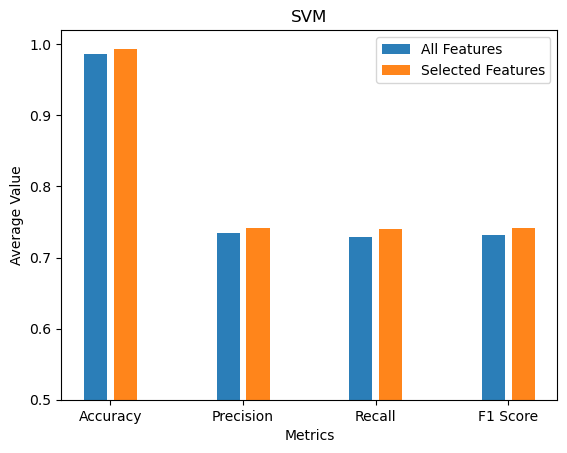

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the metric names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define the average metric values for selected features
selected_metrics = [accuracy_svm_selected, precision_svm_selected, recall_svm_selected, f1_score_svm_selected]

# Define the average metric values for all features
all_metrics = [accuracy_svm_all, precision_svm_all, recall_svm_all, f1_score_svm_all]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis with increased gaps
r1 = np.arange(len(metric_names)) * 2
r2 = [x + bar_width + 0.1 for x in r1]

# Calculate the center position for metric names
metric_names_center = [(r1[i] + r2[i]) / 2 for i in range(len(r1))]

# Create the bar plot with reversed order and modified colors
plt.bar(r1, selected_metrics, width=bar_width, alpha=0.95, label='All Features')
plt.bar(r2, all_metrics, width=bar_width, alpha=0.95,label='Selected Features')

# Add labels, title, and x-axis tick labels
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.title('SVM')
plt.xticks(metric_names_center, metric_names)

# Set the y-axis range
plt.ylim(0.5, 1.02)

# Add a legend
plt.legend()

# Show the plot
plt.show()
